<p style="border:2px solid black"> </p>
<span style="font-family:Lucida Bright;">
<p style="margin-bottom:1cm"></p>
<center>
<font size="7"><b>Social Data Analysis and Visualization</b></font>
<p style="margin-bottom:1cm"></p>
<font size="3"><b>Final Project</b></font>
<p style="margin-bottom:1cm"></p>
<font size="6"><b>Demographics of Copenhagen</b></font>
<p style="margin-bottom:0.8cm"></p>
<font size="3"><b>Wojciech Mazurkiewicz, DTU, 14 May 2021</b></font>
<p style="margin-bottom:1.5cm"></p>
<font size="6"><b>Data Visualization</b></font>
<br>
<font size="3"><b></b></font>
</center>
<p style="margin-bottom:0.7cm"></p>
<p style="border:2px solid black"> </p>

# How to read this notebook

<p style="border:2px solid black"> </p>

Please note that the pre-rendered outputs will first display properly when the notebook is __trusted__.

If you are viewing the HTML-version of the notebook and would like to download the .ipynm file, you can do it [here](https://social-data-analysis-and-visualization-final-project.s3.eu-central-1.amazonaws.com/data_visualization.ipynb).

# Introduction

<p style="border:2px solid black"> </p>

This notebook aims to describe the process of visualizing of the data about different demographical quantites for Copehhagen, including: 

1. country of origin
1. citizenzhip (Danes vs. western and non-western non-Danes)
1. marital status
1. family type and children
1. income
1. life span
1. population movement data (immigration, births, deaths, etc.)

Each demographical quantity is described in its own section. 


# Initialization

<p style="border:2px solid black"> </p>

The initialization procedure, including the definitions of many the functions that will be used to load and clean the data in this notebook, is defined in the [Initialization notebook](https://social-data-analysis-and-visualization-final-project.s3.eu-central-1.amazonaws.com/initialization.html). Let's run it now:

In [17]:
%run ./initialization.ipynb

Loading BokehJS ...

# Load data

<p style="border:2px solid black"> </p>

Let's load the object containing all dataframes containing clean data we have created in the process of [loading and cleaning](https://social-data-analysis-and-visualization-final-project.s3.eu-central-1.amazonaws.com/data_loading_and_cleaning.html). 

In [2]:
cph_data = CphData()

# Country of origin (without district information)

<p style="border:2px solid black"> </p>

## Load data

Let's load the data about the population of Copenhagen by the country of origin:

In [52]:
# Load the data containing information about the population
# of Copenhagen by the country of origin.
df_country = cph_data.country_of_origin

# Show dataframe.
display(df_country)

,Year,Quarter,Sex,Age,Country of origin,Number of people
0,2008,4,Men,0-9 years,Abu Dhabi,0.0
1,2009,4,Men,0-9 years,Abu Dhabi,0.0
2,2010,4,Men,0-9 years,Abu Dhabi,0.0
3,2011,4,Men,0-9 years,Abu Dhabi,0.0
4,2012,4,Men,0-9 years,Abu Dhabi,0.0
...,...,...,...,...,...,...
61875,2016,4,Women,>= 90 years,Zimbabwe,0.0
61876,2017,4,Women,>= 90 years,Zimbabwe,0.0
61877,2018,4,Women,>= 90 years,Zimbabwe,0.0
61878,2019,4,Women,>= 90 years,Zimbabwe,0.0


## Show data

Let's visualize the data. We will start by removing data for 2008 to set the number of available years to 12 for convenience of viewing.

In [53]:
df_country = df_country[df_country['Year'] != 2008]
display(df_country)

,Year,Quarter,Sex,Age,Country of origin,Number of people
1,2009,4,Men,0-9 years,Abu Dhabi,0.0
2,2010,4,Men,0-9 years,Abu Dhabi,0.0
3,2011,4,Men,0-9 years,Abu Dhabi,0.0
4,2012,4,Men,0-9 years,Abu Dhabi,0.0
5,2013,4,Men,0-9 years,Abu Dhabi,0.0
...,...,...,...,...,...,...
61875,2016,4,Women,>= 90 years,Zimbabwe,0.0
61876,2017,4,Women,>= 90 years,Zimbabwe,0.0
61877,2018,4,Women,>= 90 years,Zimbabwe,0.0
61878,2019,4,Women,>= 90 years,Zimbabwe,0.0


Now, let's create a dataframe where each row will represent a year and each column population of a given country of origin:

In [54]:
# Create a dataframe where each row represents a year and each columnn
df_country_vs_year = (
    df_country
    .loc[:,
         ['Year', 'Country of origin', 'Number of people']]
    .groupby(['Year', 'Country of origin'])
    .sum()
    .unstack(level=1)
    .droplevel(0, axis=1)
)

# Save the dataframe to pickle.
df_country_vs_year.to_pickle(path_results_root / 'df_country_of_origing_vs_year.pkl')

# Show the results.
display(df_country_vs_year)

Country of origin,Abu Dhabi,Afghanistan,Africa not stated,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Aruba,Asia not stated,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bermuda,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,British West Indies,Brunei,Bulgaria,Burkina Faso,Burundi,Cambodia,Cameroon,Canada,Cape Verde,Central African Republic,Chad,Chile,China,Colombia,Comoros,"Congo, Democratic Republic","Congo, Republic",Cook Islands,Costa Rica,Croatia,Cuba,Curacao,Cyprus,Czech Republic,Czechoslovakia,Denmark,Djibouti,Dominica,Dominican Republic,Dubai,East Timor,Ecuador,Egypt,El Salvador,Equatorial Guinea,Eritrea,Estonia,Eswantini,Ethiopia,Europe not stated,Falkland Islands,Fiji,Finland,France,French Guiana,French West Indies,French territories in the Pacific,GDR,Gabon,"Gambia, The",Georgia,Germany,Ghana,Greece,Grenada,Guadeloupe,Guatemala,Guinea,Guinea-Bissau,Guyana,Haiti,Honduras,Hong Kong,Hungary,Iceland,India,Indochina,Indonesia,Iran,Iraq,Ireland,...,Morocco,Mozambique,Myanmar,Namibia,Nauru,Nepal,Netherlands,Netherlands Antilles,New Zealand,Nicaragua,Niger,Nigeria,North America not stated,North Korea,North Yemen,Northern Ireland,Norway,Not stated,Oman,Pacific Islands,Pakistan,Panama,Papua New Guinea,Paraguay,Peru,Philippines,Poland,Portugal,Puerto Rico,Qatar,Republic of North Macedonia,Reunion,Romania,Russia,Rwanda,Saint Helena,Saint Kitts and Nevis,Saint Lucia,Saint Vincent and the Grenadines,Samoa,San Marino,Sao Tome and Principe,Saudi Arabia,Senegal,Serbia,Serbia and Montenegro,Seychelles,Sierra Leone,Sikkim,Singapore,Slovakia,Slovenia,Solomon Islands,Somalia,South Africa,South Korea,South Sudan,South and central America not stated,Southwest Africa,Soviet Union,Spain,Spanish territories in Africa,Sri Lanka,Stateless,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan,Tajikistan,Tanzania,Thailand,Togo,Tonga,Total,Trinidad and Tobago,Trucial Oman,Tunisia,Turkey,Turkmenistan,Tuvalu,USA,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Vatican City State,Venezuela,Vietnam,West Indies,West bank and Gaza,Yemen,Yugoslavia,"Yugoslavia, Federal Republic",Zambia,Zimbabwe
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2009,0.0,"1,168.0",16.0,54.0,587.0,0.0,44.0,0.0,298.0,147.0,0.0,7.0,595.0,292.0,59.0,1.0,20.0,383.0,9.0,65.0,242.0,1.0,14.0,0.0,11.0,61.0,"1,661.0",5.0,651.0,0.0,2.0,546.0,12.0,98.0,47.0,128.0,582.0,8.0,3.0,1.0,490.0,"3,185.0",207.0,7.0,29.0,38.0,0.0,30.0,213.0,163.0,0.0,21.0,191.0,176.0,"413,053.0",32.0,3.0,17.0,0.0,0.0,100.0,750.0,11.0,0.0,116.0,240.0,5.0,480.0,9.0,0.0,2.0,974.0,"1,804.0",0.0,0.0,0.0,0.0,3.0,347.0,39.0,"3,852.0",583.0,411.0,2.0,0.0,43.0,50.0,26.0,20.0,8.0,31.0,0.0,564.0,"1,943.0","2,117.0",0.0,151.0,"3,110.0","6,273.0",371.0,...,"4,898.0",42.0,42.0,8.0,0.0,738.0,686.0,0.0,154.0,29.0,4.0,301.0,0.0,26.0,0.0,0.0,"3,611.0",110.0,1.0,0.0,"8,457.0",12.0,1.0,11.0,245.0,"2,075.0","4,562.0",418.0,0.0,1.0,"1,801.0",0.0,827.0,942.0,43.0,0.0,0.0,1.0,1.0,2.0,1.0,0.0,52.0,47.0,63.0,36.0,2.0,133.0,0.0,178.0,197.0,63.0,0.0,"4,329.0",219.0,222.0,0.0,2.0,0.0,393.0,"1,271.0",0.0,310.0,138.0,179.0,7.0,"4,033.0",387.0,987.0,97.0,8.0,247.0,"1,739.0",57.0,7.0,"526,918.0",34.0,0.0,483.0,"8,067.0",3.0,0.0,"2,502.0",353.0,416.0,40.0,"2,878.0",104.0,39.0,0.0,0.0,99.0,988.0,2.0,0.0,70.0,"4,245.0",111.0,40.0,45.0
2010,0.0,"1,159.0",17.0,67.0,609.0,0.0,38.0,0.0,303.0,147.0,0.0,5.0,653.0,311.0,64.0,2.0,18.0,475.0,8.0,70.0,263.0,4.0,17.0,0.0,10.0,65.0,"1,736.0",5.0,711.0,0.0,2.0,756.0,14.0,104.0,46.0,145.0,650.0,9.0,3.0,1.0,503.0,"3,327.0",217.0,7.0,35.0,39.0,0.0,29.0,231.0,173.0,0.0,22.0,206.0,172.0,"418,837.0",33.0,2.0,18.0,0.0,0.0,109.0,763.0,13.0,0.0,123.0,285.0,5.0,504.0,6.0,0.0,2.0,993.0,"1,961.0",0.0,0.0,0.0,0.0,4.0,354.0,37.0,"4,131.0",620.0,429.0,2.0,0.0,42.0,56.0,

### Plot the population of top 10 countries of origin for each year

We start by getting the list of years, from most recent to least recent:

In [57]:
# Get a list of countries represented in the dataframe,
# Sorted by summarized number of people over the years
countries_sorted_by_number_of_people = (
    df_country_vs_year
    .sum()
    .sort_values(ascending=False)
    .index
    .to_list()
)

# Show the countries sorted by population
# display(countries_sorted_by_number_of_people)

# Years from biggest to smallest.
years = df_country_vs_year.index.to_list()
years.sort(reverse=True)

# Show the results.
display(years)

[2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009]

#### By number of people

Now we can show the total population of each of the countries for all the years:

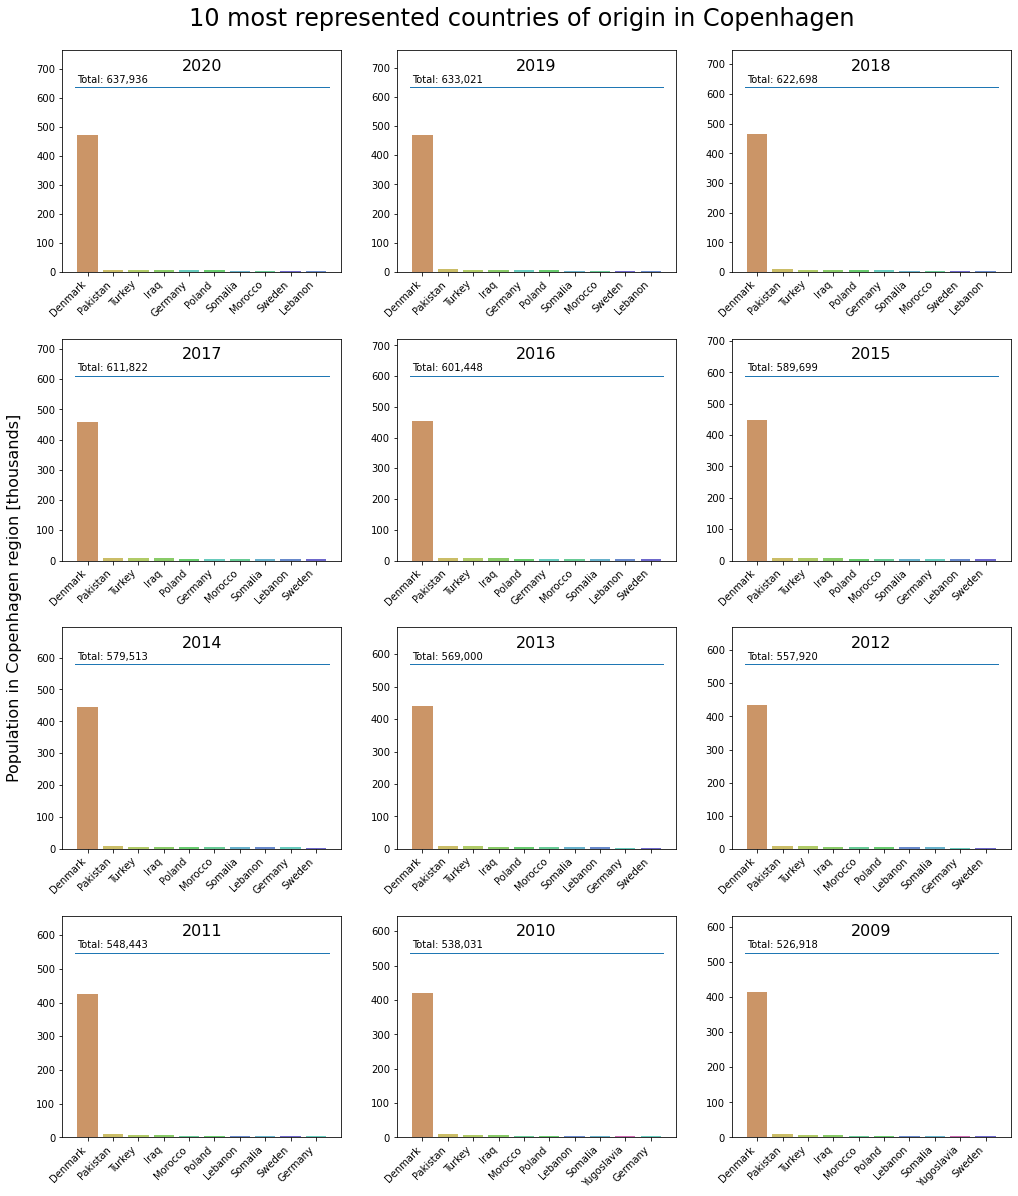

In [38]:
# Get the number of years.
n_years = len(years)

# Get the number of counries.
n_countries = len(countries_sorted_by_number_of_people)

# Get the number of plots.
n_plots = len(years)

# Define the plot grid.
n_plot_columns = 3
n_plot_rows = int(np.ceil(n_plots / n_plot_columns))

# Create a figure for the plots.
figure, all_axes = plt.subplots(
    n_plot_rows, n_plot_columns,
    figsize=(5 * n_plot_columns + 2, 5 * n_plot_rows),
    gridspec_kw={'hspace': 0.3}
)

# Get the handles of the bottom axes'.
bottom_axes = all_axes[-1, :]

# Define colors.
n_countries_to_map = 15
color_palette = sns.color_palette("hls",
                                  n_colors=n_countries_to_map)

# Map the colors to countries.
color_mapping = {country: color
                 for country, color
                 in zip(countries_sorted_by_number_of_people[:n_countries_to_map],
                        color_palette)}

# Plot.
for idx, (year, axes) in enumerate(zip(years, all_axes.ravel()[:n_plots])):

    total = df_country_vs_year.at[year, 'Total']

    sns.barplot(
        data=(
            df_country_vs_year
            .loc[year, ~df_country_vs_year.columns.isin(['Total'])]
            .sort_values(ascending=False)
            .head(10)
            .div(1e3)
            .reset_index()
        ),
        x='Country of origin',
        y=year,
        ax=axes,
        palette=color_mapping)

    # Set the title of the plot.
    axes.set_title(year, y=0.88)
    axes.set_xlabel('')
    axes.set_ylabel('')
    axes.set_ylim([axes.get_ylim()[0], total / 1e3 * 1.2])
    
    draw_threshold(total * 1e-3, axes, title=f'Total: {total:,.0f}')

    # Rotate x tick labels.
    plt.setp(
        axes.get_xticklabels(),
        rotation=45,
        ha='right',
        va='top',
    )

    # Apply the standard formatting.
    format_axes_annotation(axes)

# Annotate the figure.
# figure_x_label(figure, 'Day of week', y_position=0.06)
figure_y_label(figure, 'Population in Copenhagen region [thousands]', x_position=0.08)
figure.suptitle('10 most represented countries of origin in Copenhagen', 
                size=24,
                y=0.91)
figure.set_facecolor("white")

#### By percentage of the total population of Copenhagen

Instead of showing the absolute numbers, it might be more interesting to see the populations as a fraction of the total population of Copenhagen:

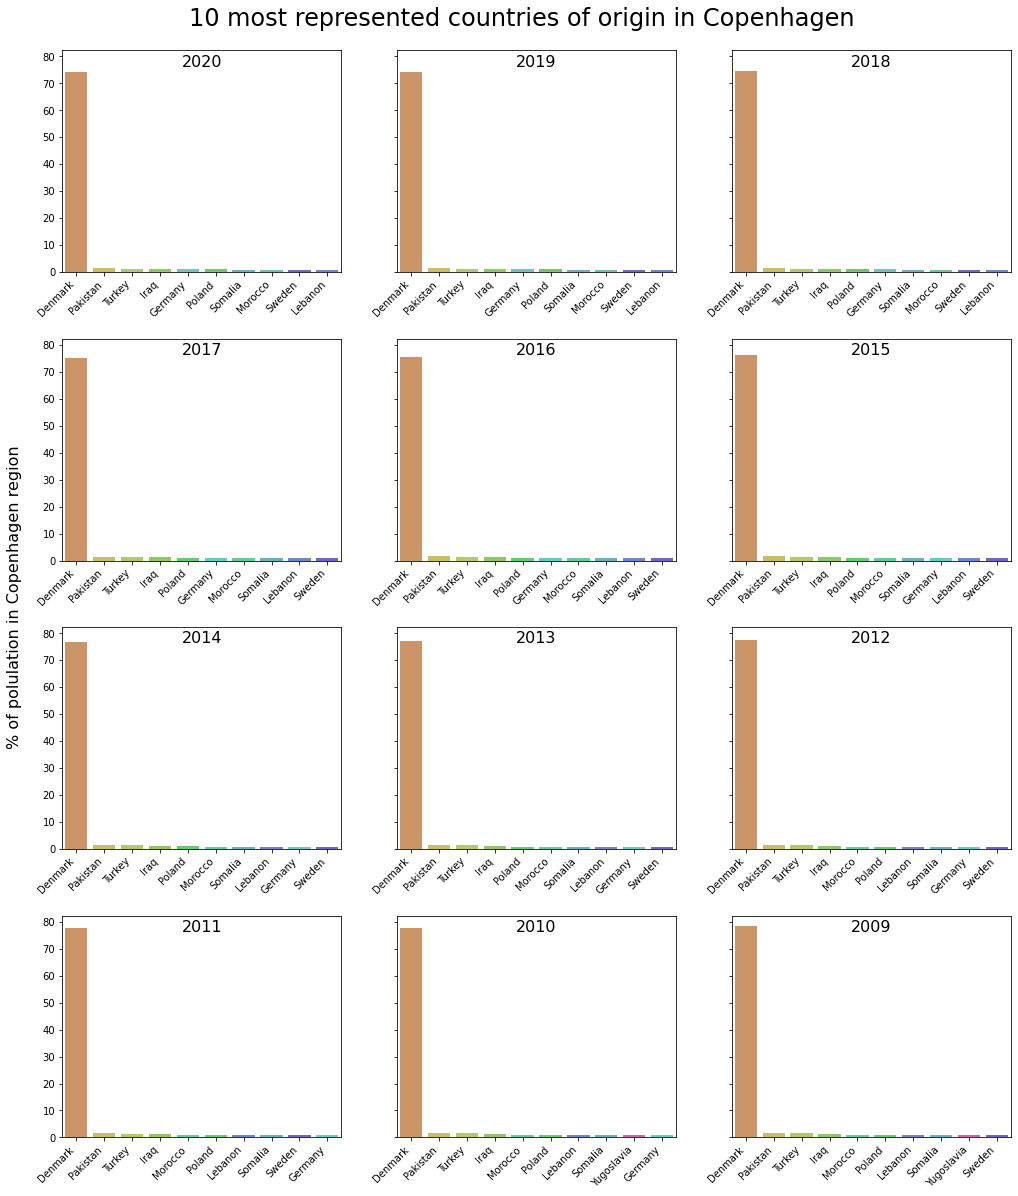

In [58]:
# Years from biggest to smallest.
years = df_country_vs_year.index.to_list()
years.sort(reverse=True)

# Get the number of counries.
n_countries = len(countries_sorted_by_number_of_people)

# Get the number of plots.
n_plots = len(years)

# Define the plot grid.
n_plot_columns = 3
n_plot_rows = int(np.ceil(n_plots / n_plot_columns))

# Create a figure for the plots.
figure, all_axes = plt.subplots(
    n_plot_rows, n_plot_columns,
    sharey='all',
    figsize=(5 * n_plot_columns + 2, 5 * n_plot_rows),
    gridspec_kw={'hspace': 0.3}
)

# Get the handles of the bottom axes'.
bottom_axes = all_axes[-1, :]

# Define colors.
n_countries_to_map = 15
color_palette = sns.color_palette("hls",
                                  n_colors=n_countries_to_map)

# Map the colors to countries.
color_mapping = {country: color
                 for country, color
                 in zip(countries_sorted_by_number_of_people[:n_countries_to_map],
                        color_palette)}

# Plot.
for idx, (year, axes) in enumerate(zip(years, all_axes.ravel()[:n_plots])):
    
    # The total number of people in Copenhagen.
    total = df_country_vs_year.at[year, 'Total']
    
    # Show the barplot.
    sns.barplot(
        data=(
            df_country_vs_year
            .loc[year, ~df_country_vs_year.columns.isin(['Total'])]
            .sort_values(ascending=False)
            .head(10)
            .mul(100 / total)
            .reset_index()
        ),
        x='Country of origin',
        y=year,
        ax=axes,
        palette=color_mapping)

    # Set the title of the plot.
    axes.set_title(year, y=0.9)
    axes.set_xlabel('')
    axes.set_ylabel('')

    # Rotate x tick labels.
    plt.setp(
        axes.get_xticklabels(),
        rotation=45,
        ha='right',
        va='top',
    )

    # Apply the standard formatting.
    format_axes_annotation(axes)

# Annotate the figure.
# figure_x_label(figure, 'Day of week', y_position=0.06)
figure_y_label(figure, r'% of polulation in Copenhagen region', x_position=0.08)
figure.suptitle('10 most represented countries of origin in Copenhagen', 
                size=24,
                y=0.91)

figure.set_facecolor("white")

figure.savefig(path_results_root / 'country_of_origin_10_most_represented.png', bbox_inches='tight')

#### Interactive bar graph of 2020 with plotly

We can also make the graph interactive by creating it using plotly:

In [59]:
# Load the dataframe containing the proportion of danes
# vs non-danes
df_danes_vs_non_danes = pd.read_pickle(
    path_results_root / 'df_danes_vs_non_danes.pkl')

year = 2020

df_country_2020 = (
    df_country_vs_year
    .loc[year, ~df_country_vs_year.columns.isin(['Total'])]
    .sort_values(ascending=False)
    .head(10)
    .mul(100 / df_country_vs_year.at[year, 'Total'])
    .reset_index()
    .rename(columns={year: '% of population'})
)

# Create the plotly bar graph.
fig = px.bar(
    df_country_2020,
    x='Country of origin',
    y='% of population',
#     barmode='group',
    color='Country of origin',
    color_discrete_sequence=px.colors.qualitative.D3
)

# Update the layout of the figure.
fig.update_layout(
    dict(plot_bgcolor='rgb(256, 256, 256)',
         paper_bgcolor='rgb(256, 256, 256)',
         title=dict(text="Population of Copenhagen in 2020",
                    x=0.5,
                    xanchor='center',
                    yanchor='top'),
         xaxis=dict(tickmode='linear',
                    #                         tick0=0.5
                    dtick=1),
         showlegend=False
#          annotations=caption_attributes(caption, y),
#          margin=margin
         )
)

# Show the figure
fig.show()

### Plot the relationship between Danes and non-Danes 

Let's create a dataframe where we will divide all countries of origin into two categories: Danes and non-Danes:

In [60]:
# Get the number of counries.
n_countries = len(countries_sorted_by_number_of_people)

# Get the number of plots.
n_plots = len(years)

# Define the plot grid.
n_plot_columns = 3
n_plot_rows = int(np.ceil(n_plots / n_plot_columns))

# Create a dataframe with data for danes vs non-danes.
df_danes_vs_non_danes = (
    df_country_vs_year
    .loc[:, 'Denmark']
    .to_frame('Danes')
)

df_danes_vs_non_danes['Non-danes'] = (
    df_country_vs_year
    .loc[:, ~df_country_vs_year.columns.isin(['Total', 'Denmark'])]
    .sum(axis=1)
    .to_frame('Non-danes')
)

df_danes_vs_non_danes[['% Danes', '% Non-danes']] = (
    df_danes_vs_non_danes[['Danes', 'Non-danes']]
    .div(df_danes_vs_non_danes.sum(axis=1), axis=0)
    .mul(100)
)


# Save the dataframe to a file
df_danes_vs_non_danes.to_pickle(path_results_root / 'df_danes_vs_non_danes.pkl')


# Show the dataframe
display(df_danes_vs_non_danes)

,Danes,Non-danes,% Danes,% Non-danes
Year,,,,
2009,"413,053.0","113,865.0",78.4,21.6
2010,"418,837.0","119,194.0",77.8,22.2
2011,"426,377.0","122,066.0",77.7,22.3
2012,"433,433.0","124,487.0",77.7,22.3
2013,"439,824.0","129,176.0",77.3,22.7
2014,"444,817.0","134,696.0",76.8,23.2
2015,"449,463.0","140,236.0",76.2,23.8
2016,"454,826.0","146,622.0",75.6,24.4
2017,"460,071.0","151,751.0",75.2,24.8


####  By number of people

Let's show how the number of Danes and non-Danes have developed over the years.

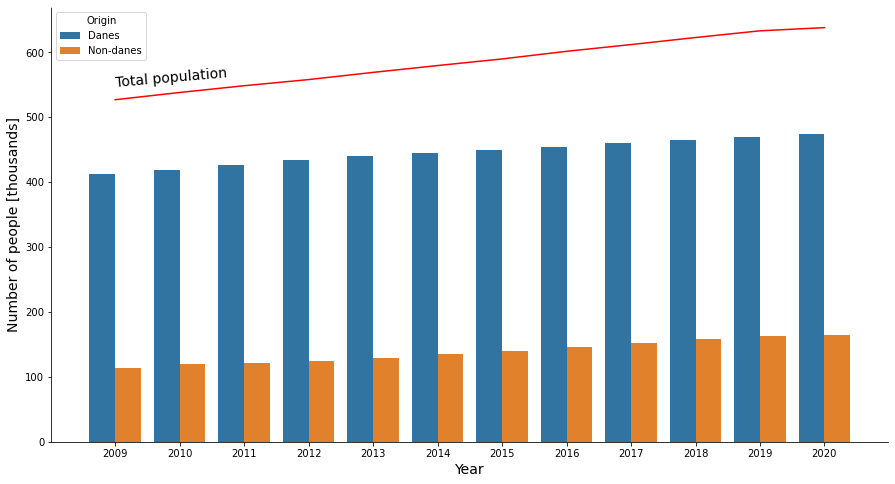

In [10]:
# Create a figure for the plots.
figure, axes = plt.subplots(figsize=(15, 8))

# Create the barplot for each year.
sns.barplot(data=(df_danes_vs_non_danes[['Danes', 'Non-danes']]
                  .div(1e3)
                  .reset_index()
                  .melt(id_vars='Year',
                        var_name='Origin',
                        value_name='Number of people')),
            x='Year',
            y='Number of people',
            hue='Origin',
            ax=axes)

# Total population over the years.
total = (
    df_danes_vs_non_danes[['Danes', 'Non-danes']]
    .div(1e3)
    .sum(axis=1)
    .to_numpy()
)

axes.plot(df_danes_vs_non_danes[['Danes', 'Non-danes']].div(1e3).sum(axis=1).to_numpy(),
          color='red')

axes.set_ylabel('Number of people [thousands]')
axes.text(0, total[0] + 20, 'Total population', rotation = 5, size=14)

format_axes(axes)
format_axes_annotation(axes)
figure.set_facecolor("white")

# Save the plot.
figure.savefig(path_results_root / 'total_population_danes_vs_non_danes_absolute.png')


#### By percentage of the total population of Copenhagen

As earlier, it might be easier to get an intuition about the numbers if the sizes of the populations are expressed as fractions of the total population of Copenhagen:

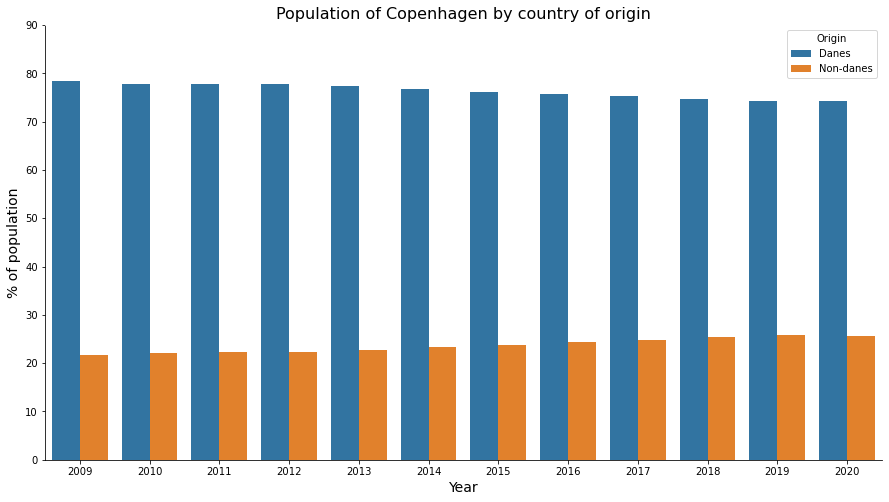

In [62]:
# Create a figure for the plots.
figure, axes = plt.subplots(figsize=(15, 8))

# Create the barplot for each year.
sns.barplot(data=(df_danes_vs_non_danes[['% Danes', '% Non-danes']]
                  .rename(columns={'% Danes': 'Danes',
                                   '% Non-danes': 'Non-danes'})
                  .reset_index()
                  .melt(id_vars='Year',
                        var_name='Origin',
                        value_name='% of population')),
            x='Year',
            y='% of population',
            hue='Origin',
            ax=axes)

# Set axes limits (to make room for the legend)
axes.set_ylim((0, 90))
axes.set_title('Population of Copenhagen by country of origin')

format_axes(axes)
format_axes_annotation(axes)
figure.set_facecolor("white")

# Save the plot.
figure.savefig(path_results_root /
               'total_population_danes_vs_non_danes_pct.png')

#### Interactive graph with plotly

In [64]:
# Get a dataframe only containing the representations in  %
df_danes_non_danes_pct = (
    df_danes_vs_non_danes[['% Danes', '% Non-danes']]
    .rename(columns={'% Danes': 'Danes',
                     '% Non-danes': 'Non-danes'})
    .reset_index()
    .melt(id_vars='Year',
          var_name='Origin',
          value_name='% of population')
)

# Create a figure containing the plotly bar graph.
fig = px.bar(
    df_danes_non_danes_pct,
    x='Year',
    y='% of population',
    color='Origin',
    barmode='group',
    color_discrete_sequence=px.colors.qualitative.D3
)

# Adjust the layout.
fig.update_layout(
    dict(plot_bgcolor='rgb(256, 256, 256)',
         paper_bgcolor='rgb(256, 256, 256)',
         title=dict(text="Population of Copenhagen",
                    x=0.5,
                    xanchor='center',
                    yanchor='top'),
         xaxis=dict(tickmode='linear',
#                     tick0=0.5,
                    dtick=1)
         )
)

# Show the figure.
fig.show()

# Save as HTML
fig.write_html(str(
    path_results_root / 'total_population_danes_vs_non_danes_pct.html'))

<p style="border:2px solid black"> </p>

# Citizenship (with district)

## Source

The data was obtained from: https://kk.statistikbank.dk/KKBEF8

## Load data

In [ ]:
# Get file paths to all the paths.
paths_csv = [path_csv
             for path_csv in path_data_citizenship_root.glob('**/*.csv')
             if path_csv.is_file()]

# Load the dataframe from files.
df_citizenship_raw = load_split_dataframe(paths_csv)

# Show the dataframe
display(df_citizenship_raw)

## Clean data

In [ ]:
# Add district type and clean the district and time data.
df_citizenship = clean_cph_dataframe(df_citizenship_raw,
                                     value_name='Number of people',
                                     df_name='Citizenship')

# Ensure correct data types.
columns_int = ['Year', 'Quarter']
columns_str = ['District', 'District type', 'Sex', 'Age', 'Citizenship']
df_citizenship = set_data_types(df_citizenship, columns_int, columns_str)

# Save the clean data.
df_citizenship.to_pickle(path_data_clean_root /
                         'cph_population_by_citizenship.pkl')

# Show the dataframe.
display(df_citizenship)

## Show statistics

In [ ]:
show_stats(df_citizenship)

<p style="border:2px solid black"> </p>

# Marital status (with district)

## Source

The data was obtained from: https://kk.statistikbank.dk/KKBEF1

## Load data

In [ ]:
# Get file paths to all the paths.
paths_csv = [path_csv
             for path_csv in path_data_marital_status_root.glob('**/*.csv')
             if path_csv.is_file()]

# Load the dataframe from files.
df_marital_status_raw = load_split_dataframe(paths_csv)

# Show the dataframe.
display(df_marital_status_raw)

## Clean data

In [ ]:
# Add district type and clean the district and time data.
df_marital_status = clean_cph_dataframe(
    df_marital_status_raw,
    value_name='Number of people',
    df_name='Marital status w. district'
)

# Ensure correct data types.
columns_int = ['Year', 'Quarter']
columns_str = ['District', 'District type', 'Sex', 'Age', 'Marital status']
df_marital_status = set_data_types(df_marital_status, columns_int, columns_str)

# Save the clean data.
df_marital_status.to_pickle(path_data_clean_root /
                         'cph_population_by_marital_status.pkl')
# Show the dataframe.
display(df_marital_status)

## Show statistics

In [ ]:
show_stats(df_marital_status)

<p style="border:2px solid black"> </p>

# Family type and children

## Source

The data was obtained from: https://kk.statistikbank.dk/KKFAM1

## Load data

In [ ]:
# Get file paths to all the paths.
path_csv = path_data_root / 'cph_children_1998-2020.csv'

# Load the dataframe from files.
df_children_raw = load_cph_df(path_csv)

# Show the dataframe.
display(df_children_raw)

## Clean data

In [ ]:
# Add district type and clean the district and time data.
df_children = clean_cph_dataframe(
    df_children_raw,
    value_name='Number of families',
    df_name='Number of children'
)

# Ensure correct data types.
columns_int = ['Year', 'Quarter']
columns_str = ['District', 'District type', 'Family type', 'Number of children']
df_children = set_data_types(df_children, columns_int, columns_str)

# Save the clean data.
df_children.to_pickle(path_data_clean_root /
                      'cph_population_by_family_type_and_number_of_chidren.pkl')

# Show the dataframe.
display(df_children)

## Show statistics

In [ ]:
show_stats(df_children)

<p style="border:2px solid black"> </p>

# Income

## Source

The data was obtained from: https://kk.statistikbank.dk/KKIND3

## Load data

In [ ]:
# Get file paths to all the paths.
path_csv = path_data_root / 'cph_income_1987-2019.csv'

# Load the dataframe from files.
df_income_raw = load_cph_df(path_csv)

# Show the dataframe.
display(df_income_raw.head(3))

## Clean data

In [ ]:
# Add district type and clean the district and time data.
df_income = clean_cph_dataframe(df_income_raw,
                                value_name='Value',
                                df_name='Income')

# Use only total personal income, and use all unique values
# in the column "Unit" as colum names.
df_income = df_sort_columns(
    df_income.loc[(df_income['Type of income']
                   .isin(['Personal income in total (ex. imputed rent and '
                          'before deductions of interest expenses)']))]
    .drop(['Type of income'], axis=1)
    .pivot_table(values='Value',
                 index=[column for column in list(df_income.columns)
                        if column not in ['Type of income', 'Unit', 'Value']],
                 columns=['Unit'],
                 aggfunc='first')
    .reset_index()
)

# Delete the name of the index of columns.
df_income.columns.name = ''

# The amount of income is in thousands of kr, not in kr.
# Let's correct it.
df_income['Amount of income (kr.)'] = df_income['Amount of income (kr.)'].mul(1000)

# Ensure correct data types.
columns_int = ['Year']
columns_str = ['District', 'District type', 'Sex']
df_income = set_data_types(df_income, columns_int, columns_str)

# Rename columns
df_income = df_income.rename(
    columns={'Amount of income (kr.)': 'Total income in district (kr.)',
             'Average income for people with the type of income (kr.)': 'Average income (kr.)',
             'People with the type of income (number)': 'Number of people'}
)

# Save the clean data.
df_income.to_pickle(path_data_clean_root /
                    'cph_income.pkl')

# Show the dataframe.
display(df_income)

## Show statistics

In [ ]:
show_stats(df_income)

<p style="border:2px solid black"> </p>

# Life span

## Source

The data was obtained from: https://kk.statistikbank.dk/KKBEF4

## Load data

In [ ]:
# Get file paths to all the paths.
path_csv = path_data_root / 'cph_life_expectancy_5_years_average_2009-2020.csv'

# Load the dataframe from files.
df_life_span_raw = load_cph_df(path_csv)

# Show the dataframe.
display(df_life_span_raw)

## Clean data

In [ ]:
# Add district type and clean the district and time data.
df_life_span = clean_cph_dataframe(df_life_span_raw,
                                   value_name='Average life span',
                                   df_name='Life span')

# Ensure correct data types.
columns_int = ['Year']
columns_str = ['District', 'District type']
df_life_span = set_data_types(df_life_span, columns_int, columns_str)

# Save the clean data.
df_life_span.to_pickle(path_data_clean_root /
                       'cph_life_span.pkl')

# Show the dataframe.
display(df_life_span)

## Show statistics

In [ ]:
show_stats(df_life_span)

<p style="border:2px solid black"> </p>

# Population movement data

## Source

The data was obtained from: https://kk.statistikbank.dk/KKBEF6

## Load data

In [ ]:
# Get file paths to all the paths.
path_csv = path_data_root / 'cph_polulation_stats_summary_1975-2020.csv'

# Load the dataframe from files.
df_movement_raw = load_cph_df(path_csv)

# Show the dataframe.
display(df_movement_raw)

## Clean data

In [ ]:
# Add district type and clean the district and time data.
df_movement = clean_cph_dataframe(df_movement_raw,
                                  df_name='Population movement')


# Make each unique value from the column "Type of movement"
# into a column
df_movement = df_sort_columns(
    df_movement
    .pivot_table(values='Value',
                 index=['District', 'District type', 'Year'],
                 columns='Type of movement',
                 aggfunc='first')
    .reset_index()
)

# Delete the name of the index of columns.
df_movement.columns.name = ''

# Ensure correct data types.
columns_int = ['Year']
columns_str = ['District', 'District type']
df_movement = set_data_types(df_movement, columns_int, columns_str)

# Save the clean data.
df_movement.to_pickle(path_data_clean_root /
                      'cph_population_movement.pkl')

# Show the dataframe.
display(df_movement)

## Show statistics

In [ ]:
show_stats(df_movement)

<p style="border:2px solid black"> </p>

# Dwellings

## Source

The data was obtained from: https://kk.statistikbank.dk/KKBOL2

## Load data

In [ ]:
# Get file paths to all the paths.
path_csv = path_data_dwellings_root / 'cph_dwellings_1991-2021.csv'

# Load the dataframe from files.
df_dwellings_raw = load_cph_df(path_csv)

# Show the dataframe.
display(df_dwellings_raw)

## Clean data

In [ ]:
# Add district type and clean the district and time data.
df_dwellings = (
    clean_cph_dataframe(df_dwellings_raw,
                        value_name='Total square meters occupied dwellings',
                        df_name='Dwellings')
    .rename(columns={'Ownership': 'Dwelling ownership'})
    .drop(['Unit'], axis=1)
)

# Ensure correct data types.
columns_int = ['Year']
columns_str = ['District', 'District type', 'Dwelling ownership']
df_dwellings = set_data_types(df_dwellings, columns_int, columns_str)

# Save the clean data.
df_dwellings.to_pickle(path_data_clean_root /
                       'cph_dwellings.pkl')

# Show the dataframe.
display(df_dwellings)

## Show statistics

In [ ]:
show_stats(df_dwellings)

<p style="border:2px solid black"> </p>

# Geoplots

## Load geodata

In [137]:
# Load the geo shapes from the json file.
with open(path_data_geo_root / 'bydele.geojson') as json_file:
    district_geo_shapes = json.load(json_file)

# Define district names
district_names = ['Nørrebro', 'Brønshøj-Husum', 'Bispebjerg',
                  'Amager Vest', 'Vanløse', 'Indre By', 'Amager Øst',
                  'Østerbro', 'Vesterbro/Kongens Enghave', 'Valby']

# Make sure the district names in the geoshapes-dict are formatted
# so that the plotly function "choropleth_mapbox" will be able to read them
for idx, district_name in enumerate(district_names):
    district_geo_shapes['features'][idx]['id'] = district_name
    district_geo_shapes['features'][0]['properties']['District'] = district_name

## Get data about the average income

In [144]:
# Get the data about the average income.
df_income = (
    df_superset.loc[:, ['Year', 'District', 'Average income (kr.)']]
)

# Add information about the difference of income between sexes.
df_income['Difference between men and women'] = (
    df_income[('Average income (kr.)', 'Men')]
    - df_income[('Average income (kr.)', 'Women')]
)

# Show the result.
display(df_income)

Year                   District Average income (kr.)            \
                                                      Men     Women   
                                                                      
                                                                      
0    2009                Amager Vest            297,098.0 247,335.0   
1    2009                 Amager Øst            285,312.0 241,607.0   
2    2009                 Bispebjerg            252,217.0 227,231.0   
3    2009             Brønshøj-Husum            285,377.0 245,974.0   
4    2009                   Indre By            376,073.0 279,981.0   
..    ...                        ...                  ...       ...   
105  2019                   Nørrebro            310,060.0 275,704.0   
106  2019                      Valby            363,440.0 301,748.0   
107  2019                    Vanløse            382,865.0 319,410.0   
108  2019  Vesterbro/Kongens Enghave            381,678.0 319,325.0   
109  2019                   Østerbro            448,024.0 342,786.0   

    Difference between men and women  
                                      
                                      
                                      
0                           49,763.0  
1                           43,705.0  
2                           24,986.0  
3                           39,403.0  
4                           96,092.0  
..                               ...  
105                         34,356.0  
106                         61,692.0  
107                         63,455.0  
108                         62,353.0  
109                        105,238.0  

[110 rows x 5 columns]

## Show geoplot

In [151]:
def show_cph_geoplot(locations,
                     values,
                     range_color=None,
                     label='color'):

    # If the color range is not specified it, set it to
    #  the range of the values.
    if range_color is None:
        range_color = (np.min(values), np.max(values))
    
    # Plot the districts with Plotly.
    figure = px.choropleth_mapbox(
        df_income,
        geojson=district_geo_shapes,
        locations=locations,
        color=values,
        color_continuous_scale="Turbo",
        range_color=range_color,
#         mapbox_style="carto-positron",
        mapbox_style="stamen-watercolor",
        zoom=10.7,
        center={"lat": 55.676098,
                "lon": 12.568337},
        opacity=0.5,
        labels={'color': label}
    )

    # Update the figure layout.
    figure.update_layout(
        margin={"r": 0,
                "t": 0,
                "l": 0,
                "b": 0})
    
    # Show the figure.
    figure.show()

In [152]:
show_cph_geoplot(
    df_income['District'].to_numpy(),
    df_income['Difference between men and women'].to_numpy(),
    label='Difference between men and women',
)

###  Plot the districts with plotly

<p style="border:2px solid black"> </p>

# Sandbox

In [65]:
# Save the superset to hard drive.
df_superset = pd.read_pickle(path_data_clean_root / 'cph_clean_superset.pkl')

display(df_superset)

Year                   District  \
                                       
                                       
                                       
0    2009                Amager Vest   
1    2009                 Amager Øst   
2    2009                 Bispebjerg   
3    2009             Brønshøj-Husum   
4    2009                   Indre By   
..    ...                        ...   
105  2019                   Nørrebro   
106  2019                      Valby   
107  2019                    Vanløse   
108  2019  Vesterbro/Kongens Enghave   
109  2019                   Østerbro   

                                      % of families                     \
    Children below 18 years not living with parents                      
                                         0 children 1 child 2 children   
                                                                         
0                                               0.2     0.0        0.0   
1                                               0.2     0.0        0.0   
2                                               0.2     0.0        0.0   
3                                               0.3     0.0        0.0   
4                                               0.2     0.0        0.0   
..                                              ...     ...        ...   
105                                             0.1     0.0        0.0   
106                                             0.1     0.0        0.0   
107                                             0.2     0.0        0.0   
108                                             0.1     0.0        0.0   
109                                             0.2     0.0        0.0   

                                     \
                                      
    3 children More than 3 children   
                                      
0          0.0                  0.0   
1          0.0                  0.0   
2          0.0                  0.0   
3          0.0                  0.0   
4          0.0                  0.0   
..         ...                  ...   
105        0.0                  0.0   
106        0.0                  0.0   
107        0.0                  0.0   
108        0.0                  0.0   
109        0.0                  0.0   

                                                                       \
    Couples living in consensual union and cohabiting couples           
                                                   0 children 1 child   
                                                                        
0                                                  8.0            2.5   
1                                                  8.9            2.3   
2                                                  7.7            1.7   
3                                                  4.9            2.0   
4                                                  7.5            2.2   
..                                                 ...            ...   
105                                               10.3            3.0   
106                                                9.1            2.8   
107                                                8.0            2.4   
108                                                9.7            3.3   
109                                                8.6            2.7   

                                                \
                                                 
    2 children 3 children More than 3 children   
                                                 
0          1.2        0.2                  0.0   
1          1.0        0.2                  0.0   
2          0.7        0.1                  0.0   
3          1.3        0.3                  0.1   
4          1.2        0.2                  0.0   
..         ...        ...                  ...   
105        1.5        0.2                  0.1   
106        1.6        0.2                  0.1   
107        

In [128]:
# max_income = (
#     df_income['Average income (kr.)']
#     #     df_income[('Average income (kr.)', 'Men')]
#     #     .loc[:, [('Average income (kr.)', 'Men')]]
#     .max()
#     .max()
# )

max_income = df_income2['Income'].max()
min_income = df_income2['Income'].min()

district_names = ['Nørrebro', 'Brønshøj-Husum', 'Bispebjerg',
                  'Amager Vest', 'Vanløse', 'Indre By', 'Amager Øst',
                  'Østerbro', 'Vesterbro/Kongens Enghave', 'Valby']
    
for idx, district_name in enumerate(district_names):
    district_geo_shapes['features'][idx]['id'] = district_name
    district_geo_shapes['features'][0]['properties']['District'] = district_name
#     district_geo_shapes['features'][0]['properties'][('District', '', '', '')] = district_name
    

In [138]:
# Plot the districts with Plotly.
figure = px.choropleth_mapbox(
    df_income,
    geojson=district_geo_shapes,
    locations=df_income['District'].to_numpy(),
    color=df_income[('Average income (kr.)', 'Men')].to_numpy(),
    color_continuous_scale="Turbo",
    range_color=(min_income, max_income),
    mapbox_style="carto-positron",
    zoom=10.7,
    center={"lat": 55.676098,
            "lon": 12.568337},
    opacity=0.5,
#     labels={('Average income (kr.)', 'Men', '', ''): 'a'}
    labels={'color': 'Income'}
)


# Udate the figure layout and show.
figure.update_layout(
    margin={"r": 0,
            "t": 0,
            "l": 0,
            "b": 0})
figure.show()